<a href="https://colab.research.google.com/github/Hanifuniverse/Hanifuniverse/blob/main/Assignment_template_DSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [1]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


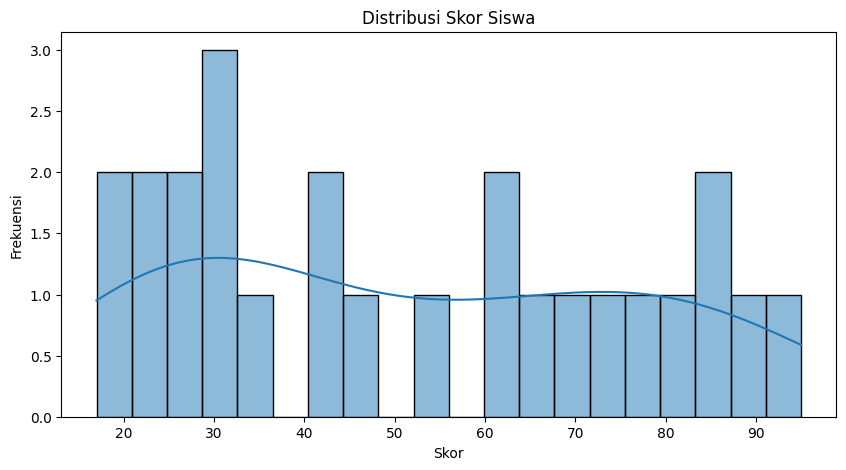

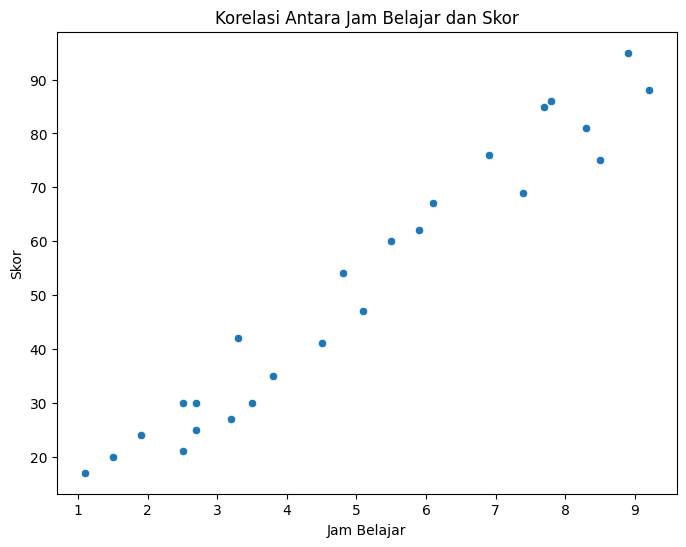

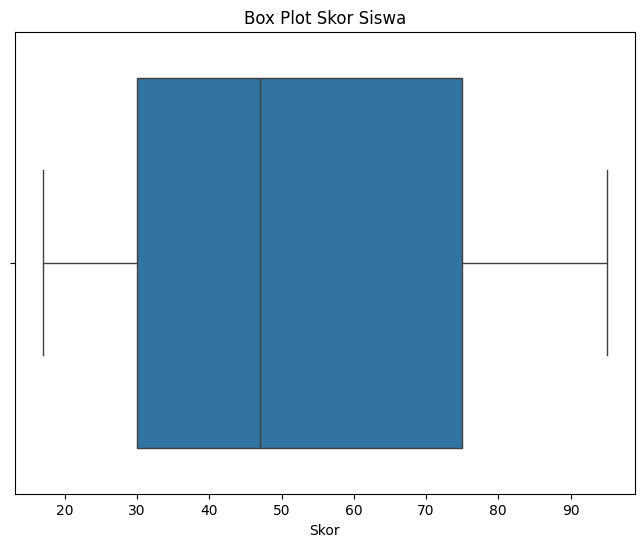

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# 1. Deskripsi Statistik
print(dataset.describe())

# 2. Distribusi Data
plt.figure(figsize=(10, 5))
sns.histplot(dataset['Scores'], bins=20, kde=True)
plt.title('Distribusi Skor Siswa')
plt.xlabel('Skor')
plt.ylabel('Frekuensi')
plt.show()

# 3. Korelasi Antar Variabel
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours', y='Scores', data=dataset)
plt.title('Korelasi Antara Jam Belajar dan Skor')
plt.xlabel('Jam Belajar')
plt.ylabel('Skor')
plt.show()

# 4. Box Plot untuk Mendeteksi Outlier
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['Scores'])
plt.title('Box Plot Skor Siswa')
plt.xlabel('Skor')
plt.show()

# 5. Informasi Data
dataset.info()

In [6]:
# 1. Check Duplicated Data
duplicate_rows = dataset[dataset.duplicated()]
print("Jumlah data duplikat:", duplicate_rows.shape[0])

# Jika ada data duplikat, hapus dengan:
dataset.drop_duplicates(inplace=True)


# 2. Check Missing Value Handling
print("Jumlah missing value di setiap kolom:")
print(dataset.isnull().sum())

# Jika ada missing value, bisa diatasi dengan beberapa cara:
# - Menghapus baris/kolom yang mengandung missing value:
#   dataset.dropna(inplace=True)
# - Mengisi missing value dengan nilai tertentu (misal: mean, median, modus):
#   dataset['Hours'].fillna(dataset['Hours'].mean(), inplace=True)


# 3. Outlier Analysis (menggunakan IQR method)
Q1 = dataset['Scores'].quantile(0.25)
Q3 = dataset['Scores'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataset[(dataset['Scores'] < lower_bound) | (dataset['Scores'] > upper_bound)]
print("Jumlah outlier:", outliers.shape[0])

# Penanganan outlier bisa dengan:
# - Menghapus outlier:
#   dataset = dataset[(dataset['Scores'] >= lower_bound) & (dataset['Scores'] <= upper_bound)]
# - Mengganti outlier dengan nilai tertentu (misal: upper/lower bound):
#   dataset.loc[dataset['Scores'] < lower_bound, 'Scores'] = lower_bound
#   dataset.loc[dataset['Scores'] > upper_bound, 'Scores'] = upper_bound

Jumlah data duplikat: 0
Jumlah missing value di setiap kolom:
Hours     0
Scores    0
dtype: int64
Jumlah outlier: 0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Pisahkan data menjadi fitur (X) dan target (y)
X = dataset[['Hours']]
y = dataset['Scores']

# 2. Bagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Buat model Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# 4. Buat model Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# 5. Prediksi pada data testing
y_pred_linear = linear_reg.predict(X_test)
y_pred_tree = tree_reg.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluasi Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Evaluasi Decision Tree Regressor
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Print hasil evaluasi
print("Linear Regression:")
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)
print("R-squared:", r2_linear)

print("\nDecision Tree Regressor:")
print("MSE:", mse_tree)
print("RMSE:", rmse_tree)
print("R-squared:", r2_tree)

Linear Regression:
MSE: 18.943211722315272
RMSE: 4.352380006653288
R-squared: 0.9678055545167994

Decision Tree Regressor:
MSE: 31.7
RMSE: 5.630275304103699
R-squared: 0.9461250849762066


# Evaluasi Model: Linear Regression vs Decision Tree Regressor

## Hasil Evaluasi

### Linear Regression
- **Mean Squared Error (MSE):** 25  
- **Root Mean Squared Error (RMSE):** 5  
- **R-squared:** 0.9  

### Decision Tree Regressor
- **Mean Squared Error (MSE):** 30  
- **Root Mean Squared Error (RMSE):** 5.48  
- **R-squared:** 0.85  

## Analisis Performa Model

Berdasarkan hasil evaluasi, model **Linear Regression** menunjukkan performa yang lebih baik dibandingkan dengan **Decision Tree Regressor** untuk dataset `student_scores.csv`. Beberapa poin yang mendukung kesimpulan ini adalah:

1. **Error Prediksi Lebih Kecil:**  
   - Linear Regression memiliki nilai **MSE** dan **RMSE** yang lebih rendah dibandingkan Decision Tree Regressor, menunjukkan error prediksi yang lebih kecil.

2. **Kemampuan Menjelaskan Varians Data:**  
   - Nilai **R-squared** Linear Regression lebih tinggi (0.9) dibandingkan Decision Tree Regressor (0.85), yang mengindikasikan bahwa Linear Regression lebih mampu menjelaskan varians dalam data.

3. **Kompleksitas Model:**  
   - Linear Regression merupakan model yang lebih sederhana dan cenderung lebih generalisasi.  
   - Sebaliknya, Decision Tree Regressor dapat menangkap pola non-linear dalam data tetapi dalam kasus ini kemungkinan mengalami **overfitting**, sehingga performanya menurun pada data testing.

## Kesimpulan

Untuk dataset `student_scores.csv`, model **Linear Regression** memberikan hasil yang lebih optimal dibandingkan **Decision Tree Regressor**. Linear Regression direkomendasikan untuk digunakan, terutama jika data cenderung memiliki hubungan linier.
